# Lab 4 Light Curve of a Variable Star

## Patrick Selep

## Abstract

A variable star was observed and a light curve created using aperature and differential photometry. Through successive observations the light curves were correlated and the period calculated. This value was in good agreeement with the published values. Through a period/magnitude relationship for RR Lyrae stars the absolute magnitude was calculated. By comparing this value to the apparent magnitude the distance was calculated. These values were close to the published values considering a number of assumptions that needed to be made with regards to the mass and metalicity of the variable star. 

## BH Auriga

BH Auriga is a RRAB variable star with a period of 0.4560898 days. It.s magnitude varies from 11.1 to 12.6.  The star was selected based on nightly recommendations from AAVSO. It was selected for its visibility, its large change, its short period and its proximity to comparison stars (Finder chart and table shown below). 

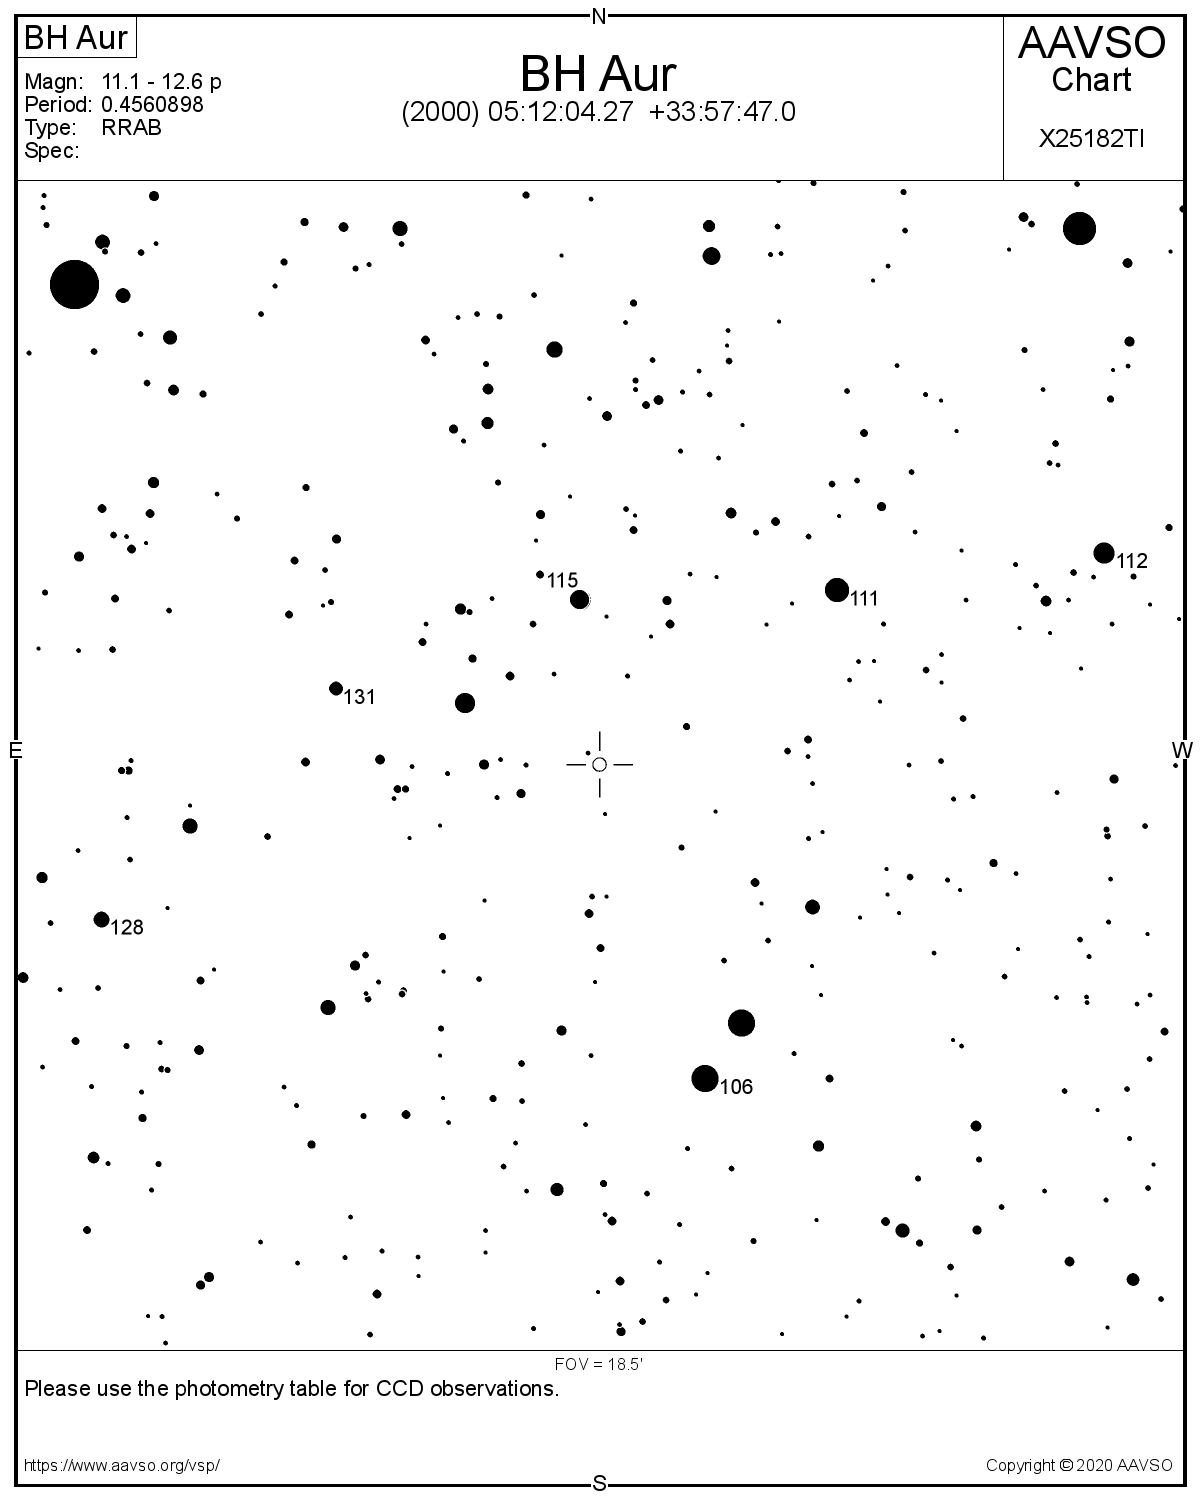

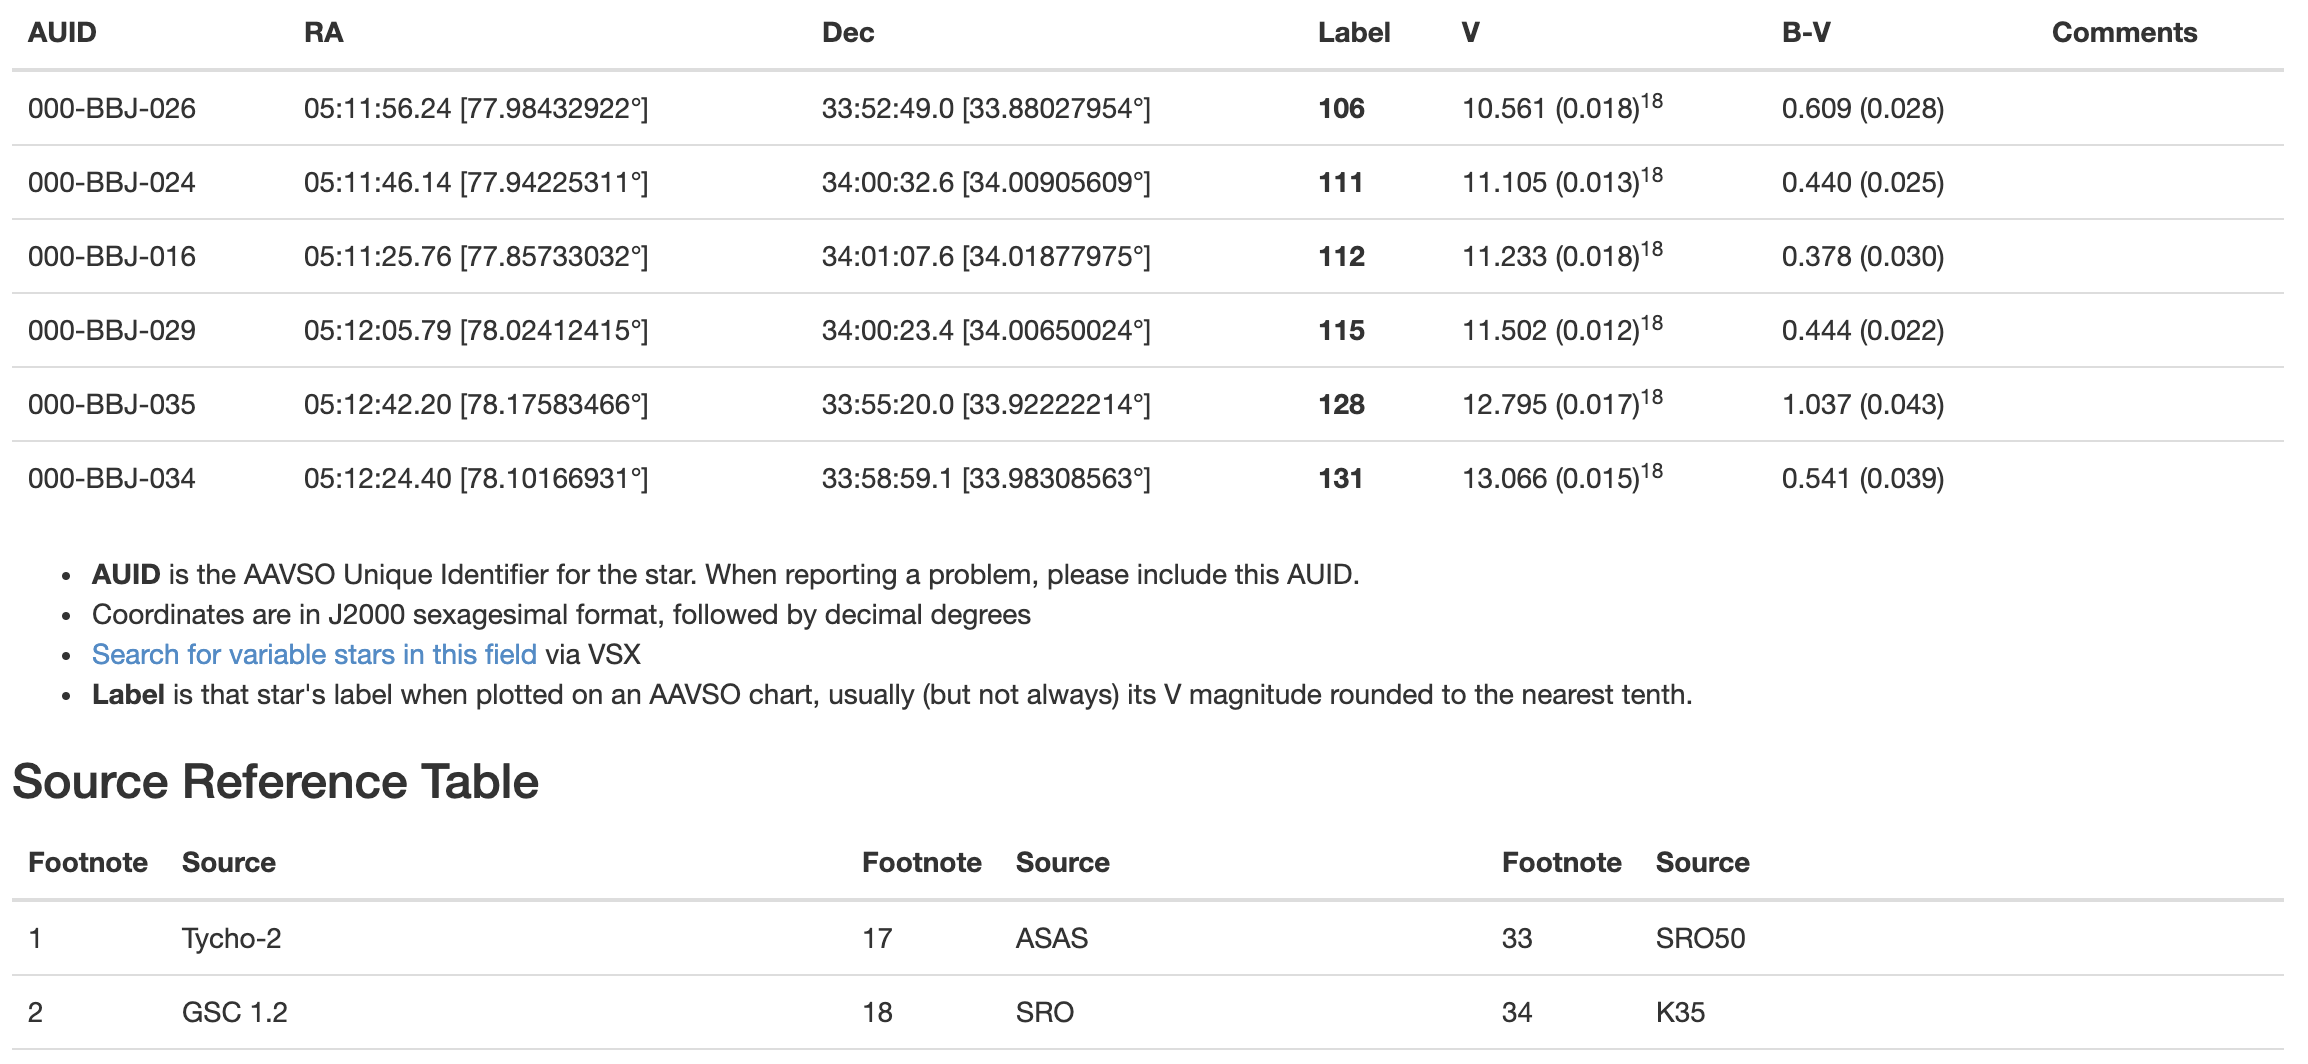

RRAB variables have a characteristic rapid rise up to a peak and a slower fall down to their minimum.  This makes it an attractive candidate to observe since you can capture both the minimum and the maximum in the same observing session.

The mechanism behind the pulsations in RR Lyrae stars is related to partial second ionization of helium. This makes the atmosphere unstable against pulsations as the opacity increases with temperature. As a layer of the atmosphere moves inward, it becomes denser and more opaque, checking the heat flow.  Heat increases and temperature builds causing a build-up of pressure that pushes the layer outward again in a cyclic manner. (Maeder, 2009)

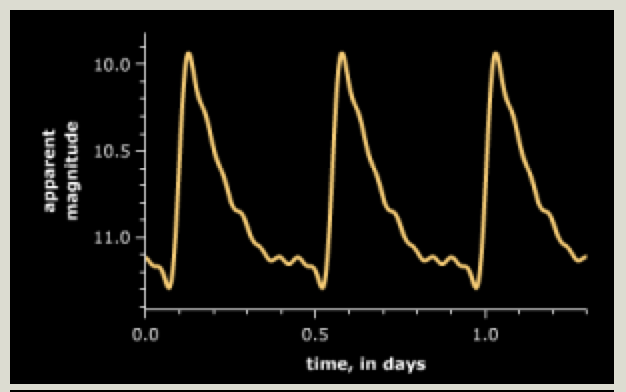

A light curve was constructed from observations taken over three nights, generally two minute exposures on a five minute cadence using 2x2 binning and a clear filter.
The observations were made on 03/03/2020, 03/04/2020 and 03/08/2020 with the UWM 14" telescope and CCD camera. The time of the maximum from each night was found from Stellarium and verified with AAVSO data.

AstroImageJ (AIJ) was used extensively to calibrate the images with bias, dark and flat field images. Astrometry.net was used to obtain astrometric solutions for each image.
AIJ's Multi-Aperature functionality was used to select stars to analyze and compare. (Collins, 2017)

The output file was then read into Phython and the data plotted in a light curve. The data from each night was translated according to the given period to construct a relatively complete light curve.

The minimum magnitudes where found to be near 12.07 and the maximums near 11.2. The period was calculated and found to be in close agreement with the published values found in Simbad. The period found was used to calculate the magnitude of the star through a period-magnitude relationship. This was then used to find the distance of the star. (Caputo, 1997)

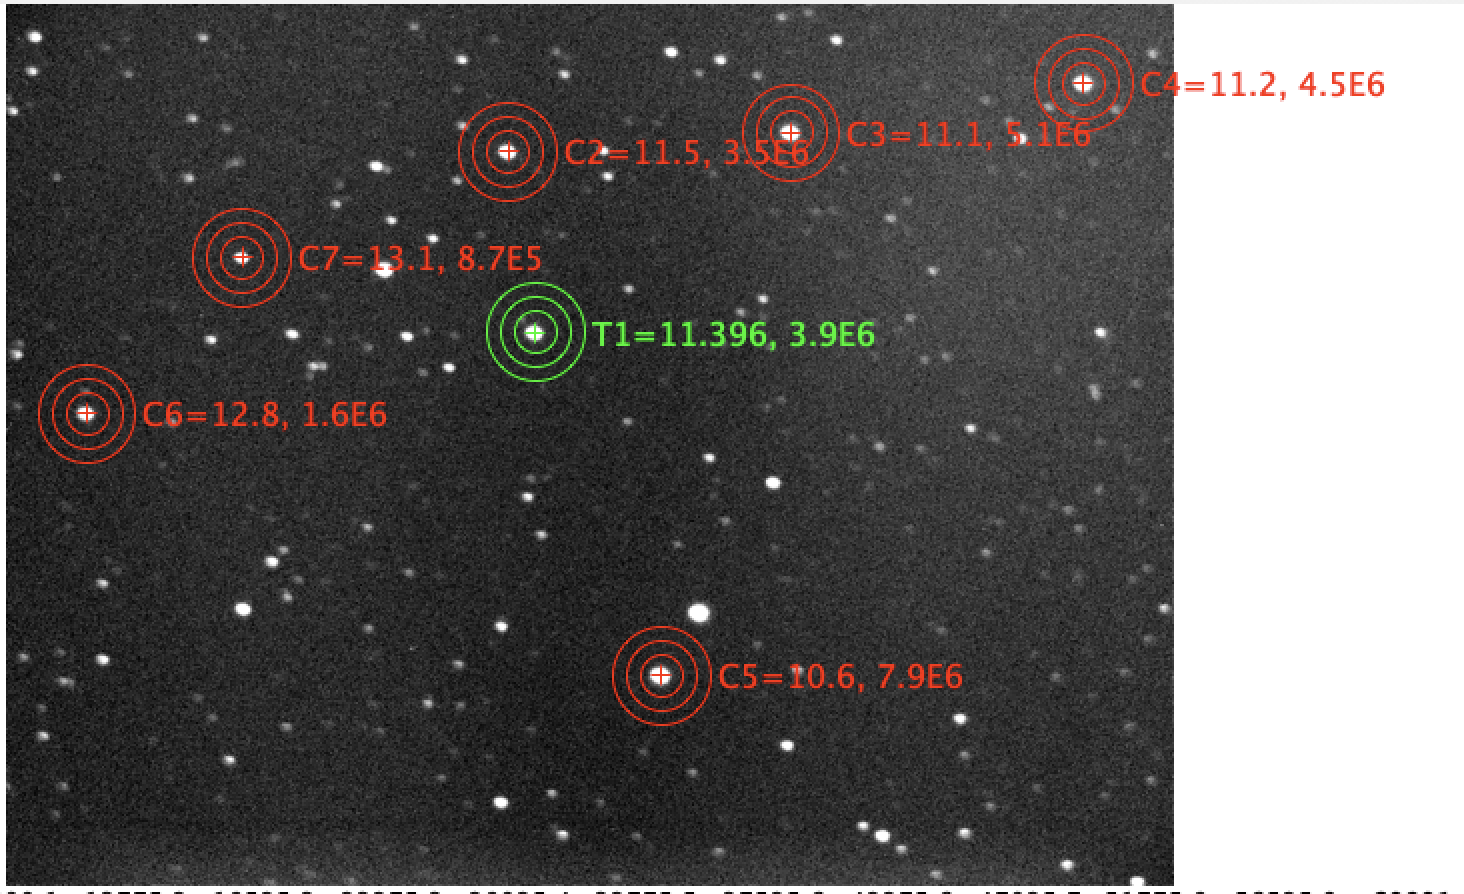


## Light Curve

In [1]:
from astropy.io import fits
from os import walk
from matplotlib import pyplot as plt

import numpy as np
from scipy import stats



In [2]:
JD_03032020_Max = 2458912.72745 # Max at 05:27.32 UTC 03-04-2020 OR 23:27:32 3-3-2020 Local

# Data covers from .6 to .727 or .127 prior to peak

JD_03042020_Max = 2458913.63963 # Max at 03:21:04 UTC 03-05-2020 OR 21:21:04 3-4-2020 Local

# Data covers from .64 to .80 or .16 past the peak

JD_03092020_Max = 2458913.74444 # Max at 05:52:00 UTC 03-05-2020 OR 00:52:00 3-9-2020 Local

# Data covers from .53 to .74 or .21 prior to the peak

In [11]:
data = np.genfromtxt(fname="50Measurements.tsv", delimiter="\t", skip_header=1,filling_values=1)  # change filling_values as req'd to fill in missing values
print("Data shows",data.shape[0],"observations in this lightcurve.")
print("The minimum magnitude was %0.4f" % max(lata[:50,21]),"and the maximum was %0.4f" % min(data[:50,21]))
print("The mean magnitude was %0.4f" % np.mean(lata[:50,21]),"and the median was %0.4f" % np.median(lata[:50,21]))

Data shows 51 observations in this lightcurve.
The minimum magnitude was 12.0782 and the maximum was 11.2128
The mean magnitude was 11.6820 and the median was 11.6716


In [13]:
lata = np.genfromtxt(fname="90Measurements.tsv", delimiter="\t", skip_header=1, filling_values=1)  # change filling_values as req'd to fill in missing values
print("Data shows",lata.shape[0],"observations in this lightcurve.")
print("The minimum magnitude was %0.4f" % max(lata[:,21]),"and the maximum was %0.4f" % min(lata[:,21]))
print("The mean magnitude was %0.4f" % np.mean(lata[:,21]),"and the median was %0.4f" % np.median(lata[:,21]))

Data shows 90 observations in this lightcurve.
The minimum magnitude was 12.0782 and the maximum was 11.2505
The mean magnitude was 11.6394 and the median was 11.6122


In [14]:
lsta = np.genfromtxt(fname="48Measurements.tsv", delimiter="\t", skip_header=1, filling_values=1)  # change filling_values as req'd to fill in missing values
print("Data shows",lsta.shape[0],"observations in this lightcurve.")
print("The minimum magnitude was %0.4f" % max(lsta[:50,21]),"and the maximum was %0.4f" % min(lsta[:50,21]))
print("(Note: not near peak time.)")
print("The mean magnitude was %0.4f" % np.mean(lsta[:50,21]),"and the median was %0.4f" % np.median(lsta[:50,21]))

Data shows 48 observations in this lightcurve.
The minimum magnitude was 12.0621 and the maximum was 11.7932
(Note: not near peak time.)
The mean magnitude was 11.9352 and the median was 11.9350


In [16]:
MeanMag = (data.shape[0]*np.mean(data[:50,21])+lata.shape[0]*np.mean(lata[:,21])+lsta.shape[0]*np.mean(lsta[:50,21]))/(data.shape[0]+lata.shape[0]+lsta.shape[0])
MedianMag = (data.shape[0]*np.median(data[:50,21])+lata.shape[0]*np.median(lata[:,21])+lsta.shape[0]*np.median(lsta[:50,21]))/(data.shape[0]+lata.shape[0]+lsta.shape[0])
print("The overall mean magnitude was %0.4f" % MeanMag,"and the overall median was %0.4f" % MedianMag)


The overall mean magnitude was 11.7360 and the overall median was 11.7828


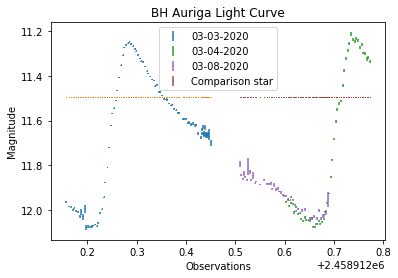

In [17]:
Lray = (lata[:,5]-(.45609*3))

C0Mag = (lata[:,21])
C0Erray = (lata[:,17])
plt.errorbar(Lray,C0Mag,yerr=C0Erray, fmt=',', label = '03-03-2020')

C1Mag = (lata[:,27])
C1Erray = (lata[:,18])
plt.errorbar(Lray,C1Mag,yerr=C1Erray, fmt=',')

Xray = (data[:50,5])
C2Array = (data[:50,21])
#print(Xray)
#print(C2Array)
C2Erray = (data[:50,17])
plt.errorbar(Xray,C2Array,yerr=C2Erray, fmt=',', label = '03-04-2020')


C3Array = (data[:50,27])
C3Erray = (data[:50,18])
plt.errorbar(Xray,C3Array,yerr=C3Erray, fmt=',')


#lray = (lsta[:50,5])
lray = (lsta[:,5]-(.45609*11))
C4Array = (lsta[:50,21])
#print(Xray)
#print(C2Array)
C4Erray = (lsta[:50,17])
plt.errorbar(lray,C4Array,yerr=C4Erray, fmt=',', label = '03-08-2020')


C5Array = (lsta[:50,27])
C5Erray = (lsta[:50,18])
plt.errorbar(lray,C5Array,yerr=C5Erray, fmt=',', label = 'Comparison star')


#print(YErrArray, XErrArray),
plt.gca().invert_yaxis()
#plt.xlim(-1,2)
#plt.ylim(18,9)
plt.title("BH Auriga Light Curve")
plt.xlabel("Observations")
plt.ylabel("Magnitude")
plt.legend()
plt.show()



## Period Calculation

In [18]:
# Minimums were too noisy, switched to time of rise (below 12 mag)
RysATime = 2458912.682659 #MinATime = 2458912.661705
RysBTime = 2458913.594116 #MinBTime = 2458913.566211
RysCTime = 2458917.700778 #MinCTime = 2458917.679843
TestPeriod = RysBTime - RysATime
TestIntervalAC = (RysCTime - RysATime)/TestPeriod
TestIntervalBC = (RysCTime - RysBTime)/TestPeriod
print("Assumed period based on first two minimums: %0.4f " % TestPeriod)
print("Number of periods between first and third: %0.4f " % TestIntervalAC)
print("Number of periods between second and third: %0.4f " % TestIntervalBC)
print("Not an integer! Try again dividing by 2")
print()
TestPeriod = (RysBTime - RysATime)/2
TestIntervalAC = (RysCTime - RysATime)/TestPeriod
TestIntervalBC = (RysCTime - RysBTime)/TestPeriod
print("Period based on first two minimums / two: %0.4f " % TestPeriod)
print("Number of periods between first and third: %0.4f " % TestIntervalAC)
print("Number of periods between second and third: %0.4f " % TestIntervalBC)
print("Not bad! Gets to within %0.4f " % (100*(TestIntervalAC-11)/TestPeriod),"percent 'uncertainty'(?)!")
print("Or compared to the published value, within %0.4f " % (100*(.45609-TestPeriod)/.45609),"percent!")
PeriodUncertainty = (TestIntervalAC-11)/TestPeriod
#print(PeriodUncertainty)

Assumed period based on first two minimums: 0.9115 
Number of periods between first and third: 5.5056 
Number of periods between second and third: 4.5056 
Not an integer! Try again dividing by 2

Period based on first two minimums / two: 0.4557 
Number of periods between first and third: 11.0112 
Number of periods between second and third: 9.0112 
Not bad! Gets to within 2.4582  percent 'uncertainty'(?)!
Or compared to the published value, within 0.0793  percent!


## Period-Magnitude Relationship

$\text{Absolute Magnitude, } M_v(FRE) \text{, was calculated as follow:}$

$${M_v(FRE)} = {+0.16 - {1.76 {log}_{10}}M - 2.20 {log}_{10}P}$$

$\text{(A mass, M, of 0.65 solar masses and  metalicity, Y, of 0.24}$
$\text{was assumed for the purposes of this calculation.)}$

## Distance

$\text{} Distance \text{, was calculated as follow:}$

$${Distance} = {10^ {( {Apparent Magnitude} - {Absolute Magnitude} + 5 ) / 5}}$$



In [19]:
#Mv_HBE = (-1.03)-(1.90*np.log10(.65))-(2.44*np.log10(TestPeriod))
Mv_FRE = (+0.16)-(1.76*np.log10(.65))-(2.20*np.log10(TestPeriod))
#print(Mv_HBE)
Mv_FRE_err_Hi = (+0.16)-(1.76*np.log10(.65))-(2.20*np.log10(TestPeriod*(1-PeriodUncertainty)))
Mv_FRE_err_Lo = (+0.16)-(1.76*np.log10(.65))-(2.20*np.log10(TestPeriod*(1+PeriodUncertainty)))
#print(Mv_FRE_err_Hi,Mv_FRE_err_Lo)
MagUncertaintyHi = Mv_FRE_err_Hi - Mv_FRE
MagUncertaintyLo = Mv_FRE - Mv_FRE_err_Lo
#print(MagUncertaintyHi,MagUncertaintyLo)
print("Absolute Magnitude: %0.4f (+/-) %0.4f" % (Mv_FRE, MagUncertaintyHi))

Distance = ((10**((MeanMag-Mv_FRE+5)/5))) #Distance in parsecs
Dist_err_Hi = ((10**((MeanMag-(Mv_FRE_err_Hi)+5)/5))) 
Dist_err_Lo = ((10**((MeanMag-(Mv_FRE_err_Lo)+5)/5))) 
#print(Dist_err_Hi,Dist_err_Lo)
DistUncertaintyLo = Dist_err_Lo - Distance
DistUncertaintyHi = Distance - Dist_err_Hi
#print(DistUncertaintyHi,DistUncertaintyLo)
print("Distance in parsecs: %0.0f (+/-) %0.2f" % (Distance,DistUncertaintyHi))
print("Published distance: %0.0f " % (908.8430))

Absolute Magnitude: 1.2401 (+/-) 0.0238
Distance in parsecs: 1257 (+/-) 13.69
Published distance: 909 


## References

Maeder, André (2009). Physics, formation and evolution of rotating stars. Astronomy and astrophysics library. Springer. p. 373. ISBN 978-3-540-76948-4.

Collins, K. (2017).  AstroImageJ: Image Processing and Photometric Extraction for Ultra-Precise Astronomical Light Curves (Expanded Edition) arXiv:1701.04817v1

Caputo, Filippina (1997). The Period-Magnitude Diagram for RR Lyrae Stars - I. The controversy about the distance scale 1997MNRAS.284..994C   
